In [1]:
                                    #RNN 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/international-airline-passengers/international-airline-passengers.csv


In [2]:
data=pd.read_csv("/kaggle/input/international-airline-passengers/international-airline-passengers.csv",skipfooter=5)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Month                                                                           142 non-null    object
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  142 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data=data.iloc[:,1].values.reshape(-1,1).astype("float32")

In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)

In [5]:
train_size=int(len(data)*0.50)
test_size=len(data)-train_size
train=data[0:train_size,:]
test=data[train_size:len(data),:]

In [6]:
X_train=[]
y_train=[]
timesteps=12
for i in range(len(train)-timesteps+1):
    X_train.append(train[i:(i+timesteps),0])
    y_train.append(train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [7]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [8]:
regressor=Sequential()

regressor.add(SimpleRNN(units=100,activation="relu",return_sequences=True
                        ,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.05))

regressor.add(SimpleRNN(units=75,activation="relu",return_sequences=True
                        ,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer="adam",loss="mean_squared_error")

regressor.fit(X_train,y_train,epochs=200,batch_size=30)


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

Epoch 1/200
2/2 [==============================] - 3s 20ms/step - loss: 0.0269
Epoch 2/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0097
Epoch 3/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0069
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0049
Epoch 5/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0038
Epoch 6/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0038
Epoch 7/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0023
Epoch 8/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0025
Epoch 9/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0018
Epoch 10/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0018
Epoch 11/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0018
Epoch 12/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0012
Epoch 13/200
2/2 [==============================]

In [9]:
inputs=data[len(data)-len(test)-timesteps:]


In [10]:
X_test=[]
for i in range(timesteps,inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_airline_passengers=regressor.predict(X_test)
predicted_airline_passengers=scaler.inverse_transform(predicted_airline_passengers)

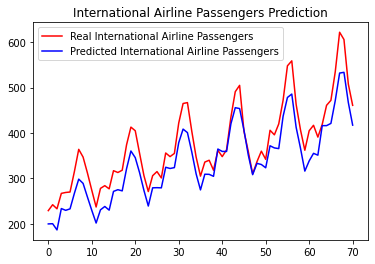

In [11]:
plt.plot(scaler.inverse_transform(test),color="red",label="Real International Airline Passengers")
plt.plot(predicted_airline_passengers,color="blue",label="Predicted International Airline Passengers")
plt.title("International Airline Passengers Prediction")
plt.legend()
plt.show()